In [54]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [55]:
theta = np.array([30.7,44.0,54.6,64.0,72.6,80.9,97.1,105.3,113.8,123.0,133.2])/2.
dhkl = 0.15418*10**(-9)/(2*np.sin((theta/180.)*np.pi))
print('$d_{hkl}$', dhkl)

$d_{hkl}$ [2.91219205e-10 2.05789224e-10 1.68080399e-10 1.45474991e-10
 1.30216696e-10 1.18822248e-10 1.02850615e-10 9.69753413e-11
 9.20237288e-11 8.77201853e-11 8.39984870e-11]


In [56]:
onePerdhlSqr = 1/dhkl**2
print('$\frac{1}{d_{hkl}^{2}}$', onePerdhlSqr)

$rac{1}{d_{hkl}^{2}}$ [1.17912535e+19 2.36131944e+19 3.53969515e+19 4.72523404e+19
 5.89748246e+19 7.08279166e+19 9.45336038e+19 1.06335277e+20
 1.18086526e+20 1.29957372e+20 1.41728462e+20]


In [57]:
print('N', onePerdhlSqr/onePerdhlSqr[0])

N [ 1.          2.00260256  3.0019668   4.00740604  5.00157381  6.00681825
  8.01726499  9.01814867 10.01475595 11.02150604 12.019796  ]


In [58]:
theta2 = np.array([38.3, 44.52, 64.75, 77.76, 81.95, 98.38, 111.15, 115.56, 135.9])/2.
dhkl2 = 0.15418*10**(-9)/(2*np.sin((theta2/180.)*np.pi))
print('$d_{hkl}$', dhkl2)

$d_{hkl}$ [2.35000111e-10 2.03505635e-10 1.43970118e-10 1.22815136e-10
 1.17563692e-10 1.01852207e-10 9.34575013e-11 9.11221661e-11
 8.31736003e-11]


In [59]:
N = np.array([3., 4., 8.,11.,12.,16., 19., 20., 24. ])
ahkl = np.sqrt(N*dhkl2**2)
print(ahkl, np.average(ahkl), np.var(ahkl))

[4.07032133e-10 4.07011271e-10 4.07208988e-10 4.07331725e-10
 4.07252575e-10 4.07408826e-10 4.07371804e-10 4.07510715e-10
 4.07465761e-10] 4.0728819973929836e-10 2.825333310977504e-26


Tengelymetszet, hiba:  [-9.54178704e-14  4.07485851e-10] [1.12835101e-14 3.01025115e-14]


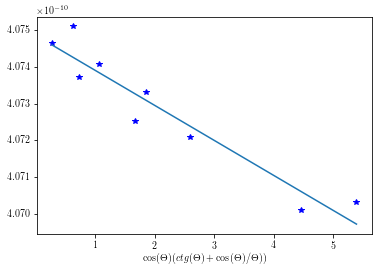

In [60]:
def hocuspocus(theta):
    thetan = np.radians(theta)
    return np.cos(thetan)*(1/np.tan(thetan) + np.cos(thetan)/thetan)

plt.plot(hocuspocus(theta2), ahkl,'b*')

from scipy.optimize import curve_fit 

def egyenes(x, m, b):
    return m*x + b

popt, pcov = curve_fit(egyenes, hocuspocus(theta2), ahkl)
perr = sqrt(diag(pcov))

plt.plot(hocuspocus(theta2), egyenes(hocuspocus(theta2), *popt))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
xlabel('$\cos(\Theta)(ctg(\Theta) + \cos(\Theta)/\Theta))$')

print('Tengelymetszet, hiba: ',popt, perr)

In [61]:
theta3 = np.array([43.846, 75.247, 91.471, 119.564, 140.826])/2.
dhkl3 = 0.15418*10**(-9)/(2*np.sin((theta3/180.)*np.pi))
print(dhkl3)

[2.06476207e-10 1.26279737e-10 1.07648755e-10 8.92124840e-11
 8.18249184e-11]


In [66]:
print('Félértékszélesség', 0.2985)
betaF = np.sqrt((0.2985**2-0.1**2))*np.pi/180.
atlSzemcsemeret = 4*0.15418*10**(-9)/(3*betaF*cos(43.846*np.pi/180))
print(atlSzemcsemeret)

Félértékszélesség 0.2985
5.806797484981999e-08
